# CFR and CFR Ratio Code for Manuscript

In [1]:
# Imports
%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
strain_names = ["Other", "Beta", "Delta", "Omicron"]
deaths = np.array([185, 957, 1160, 381])
cases = np.array([6043, 27932, 27871, 26218])

In [3]:
priors = np.array([1., 1.])

In [4]:
def posterior(deaths, cases, priors):
    alpha = deaths + priors[0]
    bet = cases - deaths + priors[1]
    return st.beta(alpha,bet)

In [5]:
def cfr_pc(posterior):
    return 100.*posterior.ppf(np.array([0.5, 0.025, 0.975]))

In [6]:
for i in range(0,4):
    cfrs = cfr_pc(posterior(deaths[i],cases[i], priors))
    print("{}: {:.2f} ({:.2f}, {:.2f}) %".format(strain_names[i], cfrs[0], cfrs[1], cfrs[2]))
cfrs = cfr_pc(posterior(np.sum(deaths),np.sum(cases), priors))
print("{}: {:.2f} ({:.2f}, {:.2f}) %".format("Overall", cfrs[0], cfrs[1], cfrs[2]))

Other: 3.07 (2.66, 3.53) %
Beta: 3.43 (3.22, 3.65) %
Delta: 4.16 (3.93, 4.40) %
Omicron: 1.46 (1.32, 1.61) %
Overall: 3.05 (2.94, 3.16) %


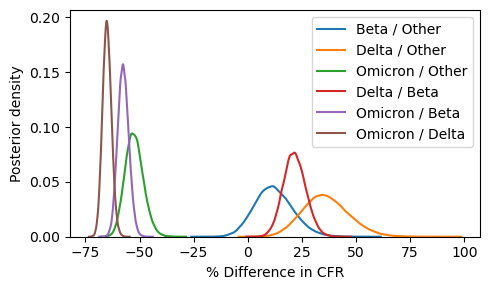

In [11]:
nsim = 100000
np.random.seed(593)
plt.figure(figsize=(5,3))
for i in range(0,4):
    for j in range(i+1,4):
        rv1 = posterior(deaths[i],cases[i], priors)
        rv2 = posterior(deaths[j],cases[j], priors)
        X = rv1.rvs(size=nsim)
        Y = rv2.rvs(size=nsim)
        Z = 100*((Y/X)-1.)
        sns.kdeplot(Z, label=(strain_names[j] +" / "+ strain_names[i]))
plt.legend()
plt.xlabel('% Difference in CFR')
plt.ylabel('Posterior density')
plt.tight_layout()
plt.savefig('./cfr_ratios.pdf')